Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read Data and visualize them

In [2]:
stock_df = pd.read_csv(r"C:\Learning\PhD\Nelinearni_filtrace\CEZ.csv")
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-28,635.0,640.0,634.0,636.0,584.163025,179277
1,2021-06-29,639.0,639.0,633.5,633.5,581.866760,284918
2,2021-06-30,635.5,638.5,634.5,638.0,586.000000,1078018
3,2021-07-01,594.0,598.5,589.0,594.0,594.000000,436889
4,2021-07-02,596.0,599.0,595.0,598.0,598.000000,143213
...,...,...,...,...,...,...,...
246,2022-06-20,1178.0,1208.0,1178.0,1204.0,1204.000000,249218
247,2022-06-21,1202.0,1205.0,1182.0,1185.0,1185.000000,157357
248,2022-06-22,1185.0,1187.0,1165.0,1180.0,1180.000000,226733
249,2022-06-23,1180.0,1182.0,1119.0,1158.0,1158.000000,428923


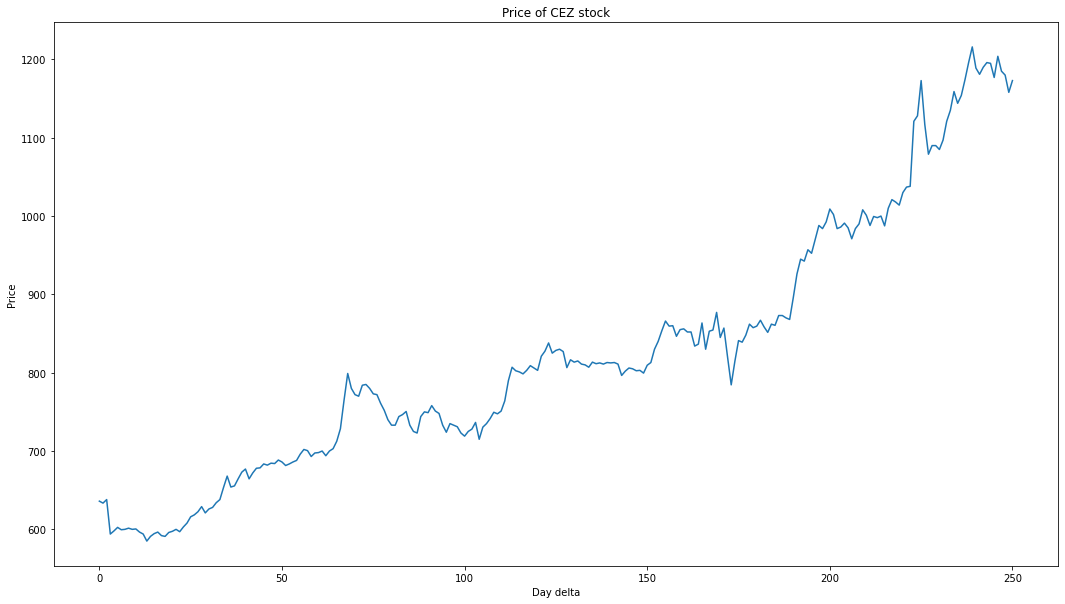

In [3]:
plt.figure(figsize=(18,10))
plt.plot(stock_df["Close"])
plt.title("Price of CEZ stock")
plt.ylabel("Price")
plt.xlabel("Day delta")
plt.show()

For the data we would like to estimate growth, which means corelation in time to price. For that purpose we asume formula.
<img src="Images/lin_form.png"  width = 200 height=100 />
We assume noise estimation equals to 0.
<img src="Images/noise_estimation.png" width = 200 height=100 />
Our equation can be written as:
<img src="Images/LSE_formula.png" width = 200 height=100 />
From this we can state our error that is equal to measurement minus our estimation.
<img src="Images/LSE_error.png" width = 200 height=100 />
We sum errors and power them to 2 in order to get positive results and increase loss of most distant estimate, so we get our cost function. Difference in weighter is by weighting each measurement by its variance. 
<img src="Images/Weighted_LSE_error_sum.png" width = 200 height=100 />
Now we only put previous into cost function equation, where we are dividing by variance. 
<img src="Images/Weighted_LSE_cost_function_before_derivation.png" width = 400 height=200 />
And because we want to minimize it we use derivation equal to zero.
<img src="Images/Weighted_LSE_cost_function_derivation_.png" width = 400 height=200 />
And after reformulation we got our final formula for parameter estimation.
<img src="Images/Weighted_LSE_final_formula.png" width = 400 height=200 />
Then we would like to get uncertainty of our estimation.
<img src="Images/Weighted_LSE_uncertainty_definition.png" width = 600 height=400 />
And after formula simplification we get result
<img src="Images/Weighted_LSE_uncertainty_formula.png" width = 600 height=400 />

In our case for H measumerement we will use delta of time, which is for us 1 day or we can use as increase of 1 per record and we would like to be predicting close price. We decided to measure certainty of measurement sigma^2 based on date of measurement, therefore we need to calculate sigma and later apply it.

In [4]:
stock_df["DayOfWeek"] = pd.to_datetime(stock_df["Date"]).dt.dayofweek
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek
0,2021-06-28,635.0,640.0,634.0,636.0,584.163025,179277,0
1,2021-06-29,639.0,639.0,633.5,633.5,581.866760,284918,1
2,2021-06-30,635.5,638.5,634.5,638.0,586.000000,1078018,2
3,2021-07-01,594.0,598.5,589.0,594.0,594.000000,436889,3
4,2021-07-02,596.0,599.0,595.0,598.0,598.000000,143213,4
...,...,...,...,...,...,...,...,...
246,2022-06-20,1178.0,1208.0,1178.0,1204.0,1204.000000,249218,0
247,2022-06-21,1202.0,1205.0,1182.0,1185.0,1185.000000,157357,1
248,2022-06-22,1185.0,1187.0,1165.0,1180.0,1180.000000,226733,2
249,2022-06-23,1180.0,1182.0,1119.0,1158.0,1158.000000,428923,3


In [5]:
stock_df["SigmaSquared"] = 0
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,SigmaSquared
0,2021-06-28,635.0,640.0,634.0,636.0,584.163025,179277,0,0
1,2021-06-29,639.0,639.0,633.5,633.5,581.866760,284918,1,0
2,2021-06-30,635.5,638.5,634.5,638.0,586.000000,1078018,2,0
3,2021-07-01,594.0,598.5,589.0,594.0,594.000000,436889,3,0
4,2021-07-02,596.0,599.0,595.0,598.0,598.000000,143213,4,0
...,...,...,...,...,...,...,...,...,...
246,2022-06-20,1178.0,1208.0,1178.0,1204.0,1204.000000,249218,0,0
247,2022-06-21,1202.0,1205.0,1182.0,1185.0,1185.000000,157357,1,0
248,2022-06-22,1185.0,1187.0,1165.0,1180.0,1180.000000,226733,2,0
249,2022-06-23,1180.0,1182.0,1119.0,1158.0,1158.000000,428923,3,0


In [6]:
for day in stock_df["DayOfWeek"].unique():
    sigma_squared = (stock_df[stock_df["DayOfWeek"]==day]["Close"]-stock_df[stock_df["DayOfWeek"]==day]["Open"]).var()
    stock_df.loc[stock_df["DayOfWeek"]==day,"SigmaSquared"] =sigma_squared
stock_df["SigmaSquared"].unique()

array([175.45928571, 142.90010204, 224.99078431, 102.68254902,
       168.86267007])

In [7]:
stock_df = stock_df.reset_index()[["index","Close","SigmaSquared"]]
stock_df

,index,Close,SigmaSquared
0,0,636.0,175.459286
1,1,633.5,142.900102
2,2,638.0,224.990784
3,3,594.0,102.682549
4,4,598.0,168.862670
...,...,...,...
246,246,1204.0,175.459286
247,247,1185.0,142.900102
248,248,1180.0,224.990784
249,249,1158.0,102.682549


In [8]:
# Define variables
H = np.ones((stock_df.shape[0],2))
H[:,1] = stock_df["index"]
y = np.array(stock_df["Close"])
R = np.diag(np.array(stock_df["SigmaSquared"]))

In [12]:
# Calculate uncertainty
Pmatrix = np.linalg.inv(np.matmul(np.matmul(H.T, np.linalg.inv(R)), H))
Pmatrix

array([[ 2.41768599e+00, -1.44655366e-02],
       [-1.44655366e-02,  1.15542727e-04]])

In [13]:
# Calculate parameters
XInverse_part = np.linalg.inv(np.matmul(np.matmul(H.T, np.linalg.inv(R)),H))
XSecond_path = np.matmul(np.matmul(H.T,np.linalg.inv(R)),y)
params = np.matmul(XInverse_part, XSecond_path)
params

array([557.83450342,   2.12255607])

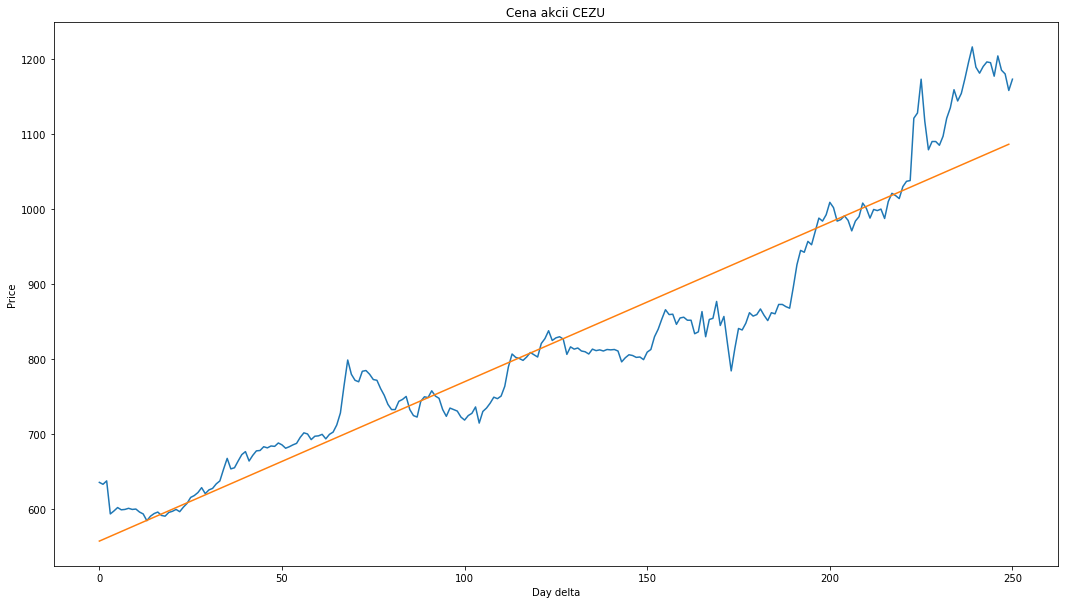

In [14]:
plt.figure(figsize=(18,10))
plt.plot(stock_df["Close"], label = "Real price")
x_est = np.arange(0,250)
plt.plot(x_est, x_est*params[1]+params[0], label = "Estimated price")
plt.title("Cena akcii CEZU")
plt.ylabel("Price")
plt.xlabel("Day delta")
plt.show()

Handwriten
<img src="Images/Weighted_LSE_odvozeni.jpg" width = 600 height=400 />